<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/Tutoria_22_07_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * preprocesamos los datos 
# * EDA
# * Escalar los datos
# * Seleccional conjunto entrenamiento/test
# * construccion del modelo 
# * Evaluacion 




In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/sightes/COFFETALKS/main/default_credit.csv', sep=',')

In [7]:
data=data.drop('index',axis=1)

In [9]:
len(data)

10000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [13]:
data.groupby('default').count()

,student,balance,income
default,,,
No,9667,9667,9667
Yes,333,333,333


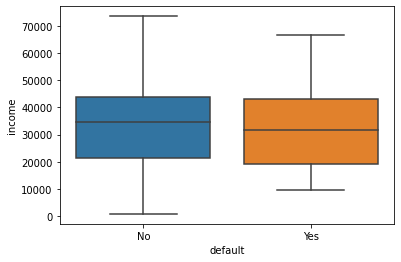

In [15]:
import seaborn as sns 
sns.boxplot(x="default", y="income", data=data)

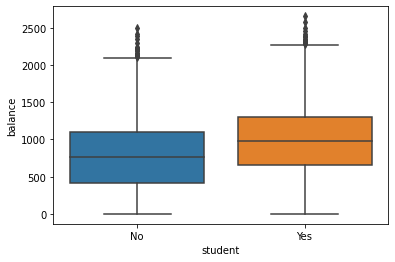

In [18]:
import seaborn as sns 
sns.boxplot(x="student", y="balance", data=data)

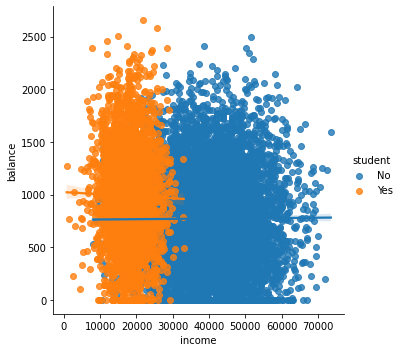

In [20]:
sns.lmplot(x="income", y="balance",hue='student', data=data)

MODELO !


In [25]:
data.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

In [30]:
pd.get_dummies(data).student_Yes

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: student_Yes, Length: 10000, dtype: uint8

In [31]:
data['is_student']=pd.get_dummies(data).student_Yes

In [33]:
data['mora']=pd.get_dummies(data).default_Yes

In [35]:
data=data.drop(['default','student'],axis=1)

In [42]:
from sklearn.model_selection import train_test_split 


,balance,income,is_student
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0
...,...,...,...
9995,711.555020,52992.378914,0
9996,757.962918,19660.721768,0
9997,845.411989,58636.156984,0
9998,1569.009053,36669.112365,0


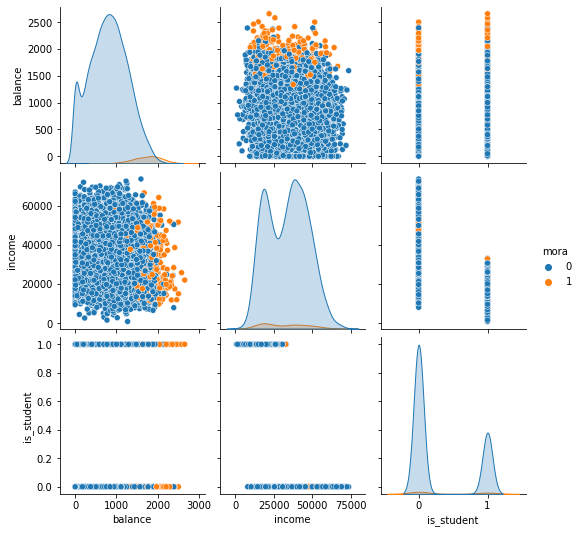

In [43]:
sns.pairplot(data, hue = 'mora', vars = ['balance','income','is_student'], kind = 'scatter')



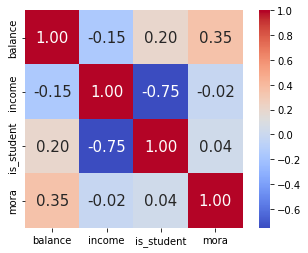

In [44]:
correlacion=data.corr(method='pearson')
sns.heatmap(correlacion,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size':15},cmap='coolwarm')

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
m1_logit = smf.logit('mora ~ balance + income + is_student', data).fit()
m1_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.462      
Dependent Variable: mora             AIC:              1579.5448  
Date:               2022-07-23 00:24 BIC:              1608.3862  
No. Observations:   10000            Log-Likelihood:   -785.77    
Df Model:           3                LL-Null:          -1460.3    
Df Residuals:       9996             LLR p-value:      3.2575e-292
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   -10.8690    0.4923  -22.0793  0.0000  -11.8339  -9.9042
balance       0.0057    0.0002   24.7365  0.0000    0.0053   0.0062
income        0.0000    0.0000    0.3698  0.7115   -0.0000   0.0000
is_student   -0.6468    0.2363   -2.7376  0.0062   -1.1098  -0.1837
==================================================================

"""

In [81]:
y=data.mora.values
X=data.drop(['mora'],axis=1)

from sklearn.model_selection import train_test_split
X=X[['balance','income','is_student']]
#X=X[['income','is_student']]

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y,train_size=0.67,test_size=0.33,random_state=42)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_tr)
X_tr = sc.transform(X_tr)
X_ts = sc.transform(X_ts)

from sklearn.linear_model import LogisticRegression
modelo=LogisticRegression()
modelo.fit(X_tr,y_tr)

import numpy as np
a=1*(modelo.predict_proba(X_ts)>=0.5)[:,0]
rest=(y_ts*2)-a
VP=np.sum([rest==1])
VN=np.sum([rest==0])
FP=np.sum([rest==-1])
FN=np.sum([rest==2])
print('Sensibilidad: ', VP/(VP+FN))
print('Precision: ', VP/(VP+FP))
print('FPR: ', FP/(FP+VN))
print('Especificidad: ', VN/(FP+VN))

Sensibilidad:  0.7
Precision:  0.023655913978494623
FPR:  0.9962382445141066
Especificidad:  0.003761755485893417


In [83]:
VP/(VP+(0.5*(FP+FN)))

0.04576523031203566

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


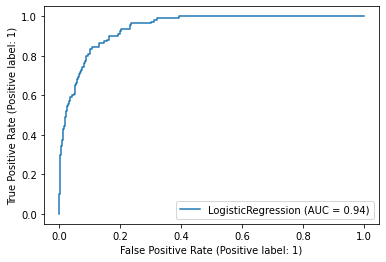

In [84]:
 from sklearn import metrics
 metrics.plot_roc_curve(modelo,X_ts,y_ts)